# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID: 60
- Names: Jackson, Giang
- Student IDs: 219515675, 
- Emails:
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
from ipywidgets import IntProgress
import pandas as pd
from IPython.display import display
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os

LOG_FILES_PATH = os.path.join(os.getcwd(), "data")

# Your file might be in a different location, so you need to customize the path
all_files = ZipFile(os.path.join(os.getcwd(), 'HTWebLog_p1.zip'), 'r')
files = all_files.namelist()

data = []
# Define the column names
ColumnNames=['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status']

#Your code to load data from all log files in the provided zip file


In [2]:
all_files.extractall(LOG_FILES_PATH)

In [3]:
def load_file_to_df(path, ColumnNames):
    return pd.read_csv(path, sep=' ', comment='#', engine='python', names=ColumnNames)

In [4]:
data_gen = (load_file_to_df(os.path.join(os.getcwd(), 'data', file),
                                ColumnNames) for file in files)

In [5]:
df_ht = pd.concat(data_gen)

In [6]:
df_ht.head()

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In [7]:
len(df_ht)

8438929

data = list()
for file in files:
    data.append(load_file_to_df(os.path.join(os.getcwd(), 'data', file),
                                ColumnNames))

In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [8]:
#Your code to remove missing values as required.
df_ht = df_ht.dropna()

In [9]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
print(len(weblog_df))

2531452


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [10]:
# Your code for feature selection
ml_df = weblog_df[["cs_method", "c_ip", "cs_uri_stem", "cs(User_Agent)", 
                   "sc_status"]].reset_index(drop=True)

#Your code to show the top 5 rows of ml_df
ml_df.head(5)

,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
0,GET,203.208.250.136,/promotion/general_footer.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0
1,GET,220.110.6.89,/Tulip/common/ja/images/sectionbanner_gifts_of...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0
2,GET,202.130.156.2,/promotion/Fp00606_1.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
3,GET,61.15.157.110,/Tulip/common/en-us/images/sidebanner_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
4,GET,221.126.234.179,/Tulip/common/en-us/images/topmenu_zh-cn.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: <br>
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;<br>
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [25]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

In [12]:
#Your code for Kmeans
iner = list()
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(le_df)
    iner.append(kmeans.inertia_)

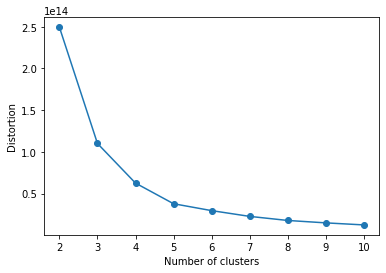

In [13]:
#Your code for visualizing K means result as elbow plot.
plt.plot(range(2, 11), iner, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [14]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark 

/bin/sh: apt-get: command not found
/bin/sh: apt-get: command not found


In [15]:
import pyspark
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

ModuleNotFoundError: No module named 'pyspark'

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

In [ ]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)

In [ ]:
sl_df.show()

+---------+---------+----+-----------+--------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|
+---------+---------+----+-----------+--------------+
|        0|    61061|2125|       1395|             0|
|        0|     8469|2136|       1540|             4|
|        0|     5916|3562|       1540|             0|
|        0|    40181|2314|       1395|             4|
|        0|    49481|2158|       1540|             4|
|        0|    58922|2136|       2139|             4|
|        0|    69733|1273|       2436|             4|
|        0|    12999|2110|       1395|             4|
|        0|    37352|3337|       1540|             4|
|        0|     5901|2337|       1395|             0|
|        0|    34352|2206|       1540|             0|
|        0|     7237|2151|       2138|             4|
|        0|    20808|2111|       1650|             4|
|        0|    28768|2126|       1540|             0|
|        0|     6503|2530|       1540|             0|
|        0|     9636|2324|  

In [ ]:
# os.environ["SPARK_HOME"] = "content/spark-3.1.1-bin-hadoop3.2"
# os.environ["JAVA_HOME"] = "content/jdk-15.0.1"

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],
                                   outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    61061|2125|       1395|             0|[61061.0,2125.0,1...|
|        0|     8469|2136|       1540|             4|[8469.0,2136.0,15...|
|        0|     5916|3562|       1540|             0|[5916.0,3562.0,15...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [ ]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_sl.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[61061.0,2125.0,1...|
|        0|[8469.0,2136.0,15...|
|        0|[5916.0,3562.0,15...|
+---------+--------------------+
only showing top 3 rows



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Your code contains trainning from train data and predicting based on the test data

lr = LogisticRegression(labelCol='sc_status')
lrModel = lr.fit(trainingData)
preds_lr = lrModel.transform(testData)

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(le_df)
pred=kmeans.predict(le_df)
confusion=metrics.confusion_matrix(y_test,pred)
print(confusion)

In [ ]:
# Your code to display TP, TN, FP, FN
# from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='sc_status')

accuracy = evaluator.evaluate(preds_lr, {evaluator.metricName: "accuracy"})
tpr = evaluator.evaluate(preds_lr, {evaluator.metricName: "truePositiveRateByLabel"})
fpr = evaluator.evaluate(preds_lr, {evaluator.metricName: "falsePositiveRateByLabel"})
precision = evaluator.evaluate(preds_lr, {evaluator.metricName: "precisionByLabel"})
recall = evaluator.evaluate(preds_lr, {evaluator.metricName: "recallByLabel"})

In [ ]:
y_true = preds_lr.select(['sc_status']).collect()
y_pred = preds_lr.select(['prediction']).collect()

import numpy as np
from sklearn.metrics import classification_report

# Your Code to display the classification results as required.

print(classification_report(np.array(y_true).reshape(-1), np.array(y_pred).reshape(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76128
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        83
           4       1.00      1.00      1.00         1

    accuracy                           1.00     76289
   macro avg       0.40      0.40      0.40     76289
weighted avg       1.00      1.00      1.00     76289



### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# K = 2
# Your code for 2-fold cross validation
lr = LogisticRegression(labelCol='sc_status')
# pipeline = Pipeline(stages=[lr])
paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01]).build()
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol='sc_status'),
                          numFolds=2)

cvModel = crossval.fit(trainingData)
cvPreds = cvModel.transform(testData)

In [ ]:
print(classification_report(np.array(cvPreds.select(['sc_status']).collect()).reshape(-1), 
                            np.array(cvPreds.select(['prediction']).collect()).reshape(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76128
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        83
           4       0.00      0.00      0.00         1

    accuracy                           1.00     76289
   macro avg       0.20      0.20      0.20     76289
weighted avg       1.00      1.00      1.00     76289



In [ ]:
print("Accuracy of cross validation model: ", evaluator.evaluate(cvPreds, {evaluator.metricName: "accuracy"}))
print("TPR of cross validation model: ", evaluator.evaluate(cvPreds, {evaluator.metricName: "truePositiveRateByLabel"}))
print("FPR of cross validation model: ", evaluator.evaluate(cvPreds, {evaluator.metricName: "falsePositiveRateByLabel"}))
print("Precision of cross validation model: ", evaluator.evaluate(cvPreds, {evaluator.metricName: "precisionByLabel"}))
print("Recall of cross validation model: ", evaluator.evaluate(cvPreds, {evaluator.metricName: "recallByLabel"}))

Accuracy of cross validation model:  0.9978896040058199
TPR of cross validation model:  1.0
FPR of cross validation model:  1.0
Precision of cross validation model:  0.9978896040058199
Recall of cross validation model:  1.0


## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

  Stored in directory: /home/rabio/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
# you can also use PySpark package, if preferred
from apyori import apriori

# Your code
records = le_df.applymap(str).values.tolist()
supp_apri = 5000*365/8438172

association_rules = apriori(records, min_support=0.005, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

def accociation_rul(rule):
    print("*"*35+"\n")
    items = [x for x in rule[0]]
    print("Rule: " + " -> ".join(items))
    print("Support: " + str(rule[1]))
    print("Confidence: " + str(rule[2][0][2]))
    print("Lift: " + str(rule[2][0][3]), "\n")
    print("*"*35+"\n\n")

for rule in list(association_results)[:5]:
    accociation_rul(rule)

***********************************

Rule: 7 -> 3156
Support: 0.008836825663690246
Confidence: 0.9905242649663479
Lift: 36.93912334228417 

***********************************


***********************************

Rule: 7 -> 3156 -> 0
Support: 0.008834850512670198
Confidence: 0.9903028692879914
Lift: 36.97226132386733 

***********************************




# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [30]:
!pip install chromedriver-install
!pip install selenium

  Created wheel for chromedriver-install: filename=chromedriver_install-1.0.3-py3-none-any.whl size=5086 sha256=801bd917032a9e8f31fe8a28bef78c08cb377b4739a8367e21d7a323a90442b7
  Stored in directory: /Users/jacksonthounaojam/Library/Caches/pip/wheels/8c/21/3d/c14d13cc1aaeabb3716dc4559f0ad8eb8b6e0e0d0a97a490e1
Successfully built chromedriver-install


In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options


def load_page(req_url):
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Firefox()
    #driver = webdriver.Chrome(os.path.join(os.getcwd(), "content", "chromedriver"),
                     #options=options)
    #driver.get(req_url)
    elem = driver.find_elements_by_xpath('//span[contains(.,"Show more")]')
    for i in range(3):
        elem[0].click()
        time.sleep(3)
    return driver.page_source

def get_text(tag_lst):
    ret_lst = list()
    for tag in tag_lst:
        ret_lst.append(tag.text)
    return ret_lst

def beautiful_soup_object(content):
    bs = BeautifulSoup(content, 'html')
    all_entries = bs.find_all("table")[1].find_all("td")
    lst_content = list()
    for i in range(0, len(all_entries), 3):
        lst_content.append(get_text(all_entries[i:i+3]))
    return lst_content

In [3]:
req_url = "https://scholar.google.com/citations?user=dqwjm-0AAAAJ"
content = load_page(req_url)
lst = beautiful_soup_object(content)

IndexError: list index out of range

In [ ]:
# Your code to crawl and generate the csv, and save it to variable create_df
create_df = pd.DataFrame(lst, columns=["Title", "Citations", "Year"])

create_df['Citations'] = create_df['Citations'].apply(lambda x: x.strip("*")).replace("", np.nan).astype("float")
create_df = create_df[~create_df["Year"].isin([""])]
create_df = create_df.groupby('Year').sum().sort_index().reset_index().iloc[6:].reset_index(drop=True)

In [ ]:
create_df.to_csv("Citation2003-2021.csv", index=False)

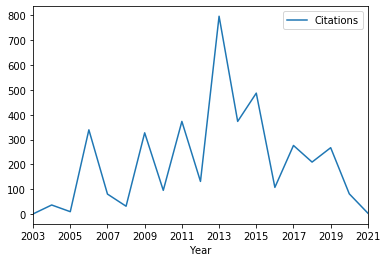

In [ ]:
create_df.set_index("Year").plot()
plt.show()

## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test
train_ar = create_df.iloc[:15]["Citations"]
test_ar = create_df.iloc[15:]["Citations"]

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to predict the citation and save it to variable preds. 
# You may need to output the confidence interval(95%) here as well
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_ar, order=(1,0,1))
model_ar = model.fit()

preds = model_ar.forecast(4)[0]
print(model_ar.summary())

                              ARMA Model Results                              
Dep. Variable:              Citations   No. Observations:                   15
Model:                     ARMA(1, 1)   Log Likelihood                -101.520
Method:                       css-mle   S.D. of innovations            209.758
Date:                Wed, 12 May 2021   AIC                            211.040
Time:                        16:04:41   BIC                            213.872
Sample:                             0   HQIC                           211.010
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             229.7618     50.682      4.533      0.001     130.426     329.097
ar.L1.Citations    -0.8290      0.285     -2.905      0.013      -1.388      -0.270
ma.L1.Citations     0.7052      

In [ ]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your code to show the performance RMSE
print("RMSE: ", np.sqrt(mean_squared_error(preds, test_ar.values)))

RMSE:  140.5844281897554


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

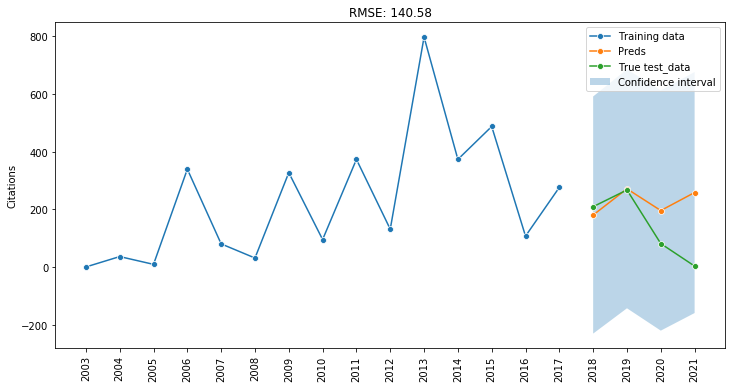

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2003, 2018), y=train_ar, label="Training data", marker='o')
sns.lineplot(x=range(2018, 2022), y=preds, label="Preds", marker='o')
sns.lineplot(x=range(2018, 2022), y=test_ar.values, label="True test_data", marker='o')
plt.fill_between(range(2018, 2022), model_ar.forecast(4)[2][:, 0], 
                 model_ar.forecast(4)[2][:, 1], alpha=0.3, label="Confidence interval")
plt.legend()
plt.xticks(range(2003, 2022), range(2003, 2022), rotation=90)
plt.title("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(preds, test_ar.values))))
plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to run grid search
p = list(range(1,3))
q = list(range(1,3))
d = [0, 2]
RMSE = []
PARAMETER = []
for a in p:
    for b in q:
        for c in d:
            model1 = ARIMA(train_ar, order=(a,c,b))
            model2 = model1.fit()
            RMSE.append(np.sqrt(mean_squared_error(test_ar.values, model_ar.forecast(4)[0])))
            PARAMETER.append("p={0},q={1},d={2}".format(a, b, c))

/home/rabio/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
# your code to generate the seach-results.csv and print the top 6 rows
Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
Results.head(6)

,RMSE,Parameter
0,140.584428,"p=1,q=1,d=0"
1,140.584428,"p=1,q=1,d=2"
2,140.584428,"p=1,q=2,d=0"
3,140.584428,"p=1,q=2,d=2"
4,140.584428,"p=2,q=1,d=0"
5,140.584428,"p=2,q=1,d=2"


In [ ]:
Results.to_csv("Search-results.csv", index=False)

### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to perform the Arima train on data 2003 to 2020
train_ar1 = create_df.Citations.values[:-1]
model3 = ARIMA(train_ar1, order=(2,0,1))
model4 = model3.fit()

# Your code to predict for 2021 and 2022
preds_21_22 = model4.forecast(2)[0]

<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

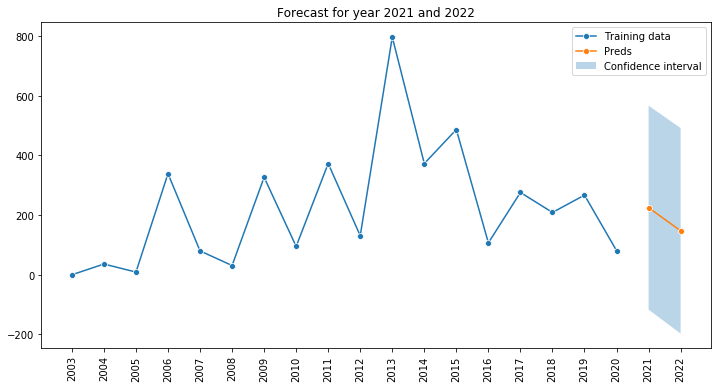

In [ ]:
# Plot the points and the prediction with its confidence interval
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2003, 2021), y=train_ar1, label="Training data", marker='o')
sns.lineplot(x=range(2021, 2023), y=preds_21_22, label="Preds", marker='o')
plt.fill_between(range(2021, 2023), model4.forecast(2)[2][:, 0], 
                 model4.forecast(2)[2][:, 1], alpha=0.3, label="Confidence interval")
plt.legend()
plt.xticks(range(2003, 2023), range(2003, 2023), rotation=90)
plt.title("Forecast for year 2021 and 2022")
plt.show()

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
